# Spectrogram Plotting
This example script plots a waveform / spectrogram and a corresponding segmentation

Note: this example notebook does the plotting directly in matplotlib and has a minimum of other dependencies
+ librosa is used for the spectrogram computations
+ soundfile is used for importing audiofiles
+ examples are given for importing data from url resources
+ for compliance testing between librosa, Kaldi, SPRAAK and torchaudio see spectrogram-librosa-torch.ipynb

## First do all the imports


In [1]:
%matplotlib inline
import os,sys,io 
import scipy.signal

from urllib.request import urlopen
from IPython.display import display, Audio, HTML

import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 

import librosa as librosa
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
try:
  import soundfile as sf
except:
  ! pip -q install soundfile
  import soundfile as sf
    
from spectrogram_utils import *

## Import data
- sampled data, reads
  + wavdata  (numpy array)
  + sr       (int)
- different levels of segmentation  In the example code 
  + TIMIT style segmentations are being read 
  + sample based segmentations are converted time based segmentations
  + segmentations are stored in a dataframe with columns ['t0','t1','seg']

In [2]:
dir='https://raw.githubusercontent.com/compi1234/spchlab/master/data/'
wavfile = "timit/si1027.wav" #@param {type:"string"}
sent_segmentation = "timit/si1027.txt" #@param {type:"string"}
word_segmentation = "timit/si1027.wrd" #@param {type:"string"}
phone_segmentation = "timit/si1027.phn" #@param {type:"string"}
word_segmentation = "timit/si1027.wrd" #@param {type:"string"}
phone_mapping = "timit/phones-61-48-39.txt" #@param {type:"string"}

# read the datafiles
wavdata, sr = read_audio_from_url(dir+wavfile)
transcript = io.StringIO(urlopen(dir+sent_segmentation).read().decode('utf-8')).readline().strip().split(None,2)[2]
segwrd = pd.read_csv(dir+word_segmentation,delim_whitespace=True,names=['t0','t1','seg'])
segphn = pd.read_csv(dir+phone_segmentation,delim_whitespace=True,names=['t0','t1','seg'])

# convert sample based segmentations to time based segmentations
segphn['t0']=indx2t(segphn['t0'],sr)
segphn['t1']=indx2t(segphn['t1'],sr)
segwrd['t0']=indx2t(segwrd['t0'],sr)
segwrd['t1']=indx2t(segwrd['t1'],sr)

# convert TIMIT61 to TIMIT39
# this routine is not great as it simply maps closures to silence instead to combining
phone_tbl = pd.read_csv(dir+phone_mapping,delim_whitespace=True,names=['T61','T48','T39'])
map61_39 = dict(zip(phone_tbl['T61'],phone_tbl['T39']))
segphn39 = segphn.replace({"seg": map61_39})

## Compute Spectrograms and Plot them
#### Basic Waveform + Spectrogram

Text(0, 0.5, 'Frequency Coefficient')

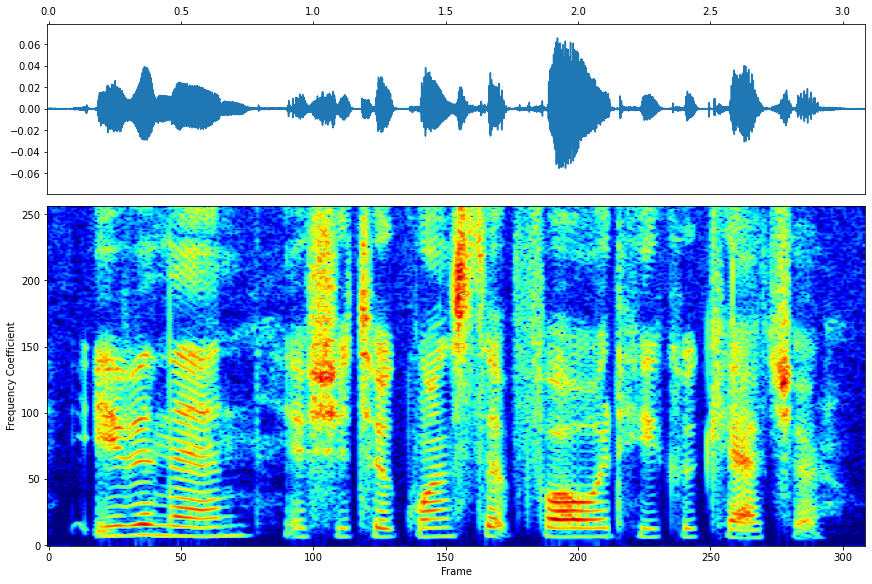

In [7]:
spg = spectrogram(wavdata,samplerate=sr)
fig=plot_spg(spg=[spg], wav=wavdata)
ax = fig.get_axes()
ax[1].set_xlabel('Frame')
ax[1].set_ylabel('Frequency Coefficient')

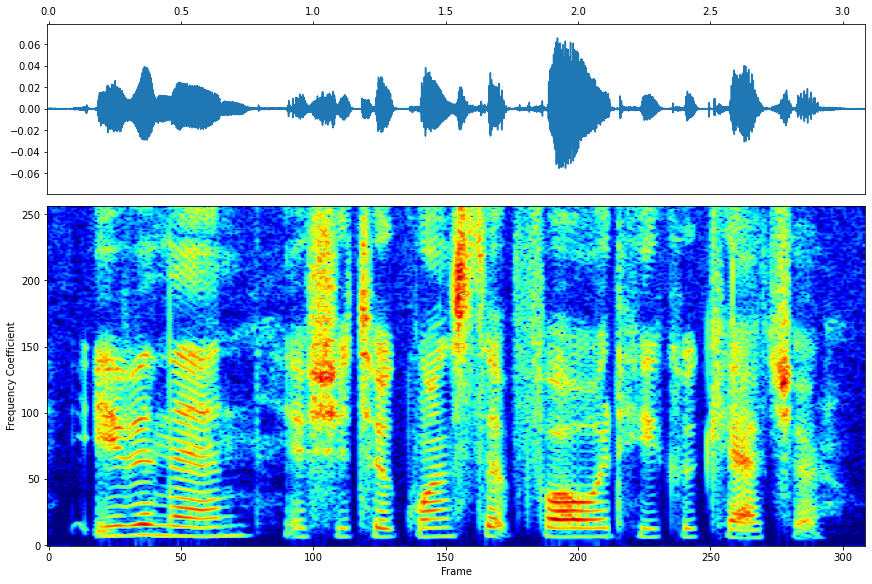

#### Multiple Spectrograms and Segmentations

Text(0, 0.5, 'mel fbank(24)')

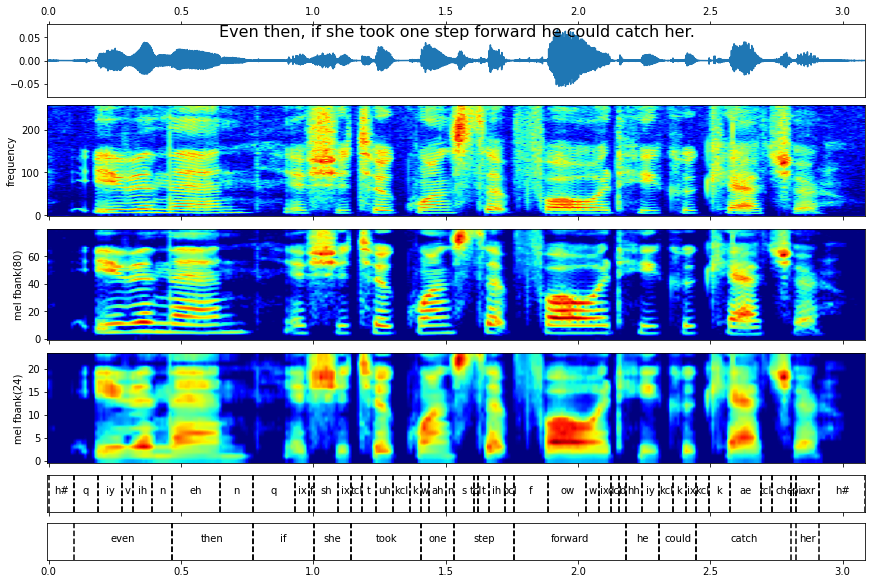

In [4]:
# compute a standard spectrogram and a 80 and 24 channel mel filterbank
spg = spectrogram(wavdata,samplerate=sr,n_mels=None)
spg80 = spectrogram(wavdata,samplerate=sr,n_mels=80)
spg24 = spectrogram(wavdata,samplerate=sr,n_mels=24)
# display audio button and the spectrograms ; add additional lables
display(Audio(data=wavdata,rate=sr))
fig=plot_spg(spg=[spg,spg80,spg24], wav=wavdata, seg=[segphn,segwrd],txt=transcript,figsize=(12,8),spg_scale=1.5)
ax = fig.get_axes()
ax[1].set_ylabel('frequency')
ax[2].set_ylabel('mel fbank(80)')
ax[3].set_ylabel('mel fbank(24)')